# Скачиваем данные и разархивируем

Подключаемся к Kaggle для того, чтобы взять датасет

In [ ]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ekaterinanovikova","key":"197254b79a634fac5f7d1bfdab40f0fc"}'}

In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d xainano/handwrittenmathsymbols

 96% 329M/343M [00:01<00:00, 197MB/s]
100% 343M/343M [00:01<00:00, 184MB/s]


In [ ]:
!ls

handwrittenmathsymbols.zip  kaggle.json  sample_data


In [ ]:
!unzip handwrittenmathsymbols.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: extracted_images/0/0_24106.jpg  
  inflating: extracted_images/0/0_2414.jpg  
  inflating: extracted_images/0/0_24177.jpg  
  inflating: extracted_images/0/0_2420.jpg  
  inflating: extracted_images/0/0_24398.jpg  
  inflating: extracted_images/0/0_24469.jpg  
  inflating: extracted_images/0/0_2462.jpg  
  inflating: extracted_images/0/0_24690.jpg  
  inflating: extracted_images/0/0_24761.jpg  
  inflating: extracted_images/0/0_2490.jpg  
  inflating: extracted_images/0/0_24982.jpg  
  inflating: extracted_images/0/0_2501.jpg  
  inflating: extracted_images/0/0_25053.jpg  
  inflating: extracted_images/0/0_25274.jpg  
  inflating: extracted_images/0/0_25345.jpg  
  inflating: extracted_images/0/0_2552.jpg  
  inflating: extracted_images/0/0_25566.jpg  
  inflating: extracted_images/0/0_25637.jpg  
  inflating: extracted_images/0/0_25858.jpg  
  inflating: extracted_images/0/0_25929.jpg  
  inflating: extra

In [ ]:
!pip install unrar

In [ ]:
!unrar x data.rar

Streaming output truncated to the last 5000 lines.
Extracting  extracted_images/z/exp75725.jpg                               98%  OK 
Extracting  extracted_images/z/exp75743.jpg                               98%  OK 
Extracting  extracted_images/z/exp75756.jpg                               98%  OK 
Extracting  extracted_images/z/exp75762.jpg                               98%  OK 
Extracting  extracted_images/z/exp75782.jpg                               98%  OK 
Extracting  extracted_images/z/exp75787.jpg                               98%  OK 
Extracting  extracted_images/z/exp75789.jpg                               98%  OK 
Extracting  extracted_images/z/exp75831.jpg                               98%  OK 
Extracting  extracted_images/z/exp75832.jpg                               98%  OK 
Extracting  extracted_images/z/exp75834.jpg                               98%  OK 
Extracting  extracted_images/

In [ ]:
!ls extracted_images

'='   +   9	      div	      H        leq   phi	  sqrt	  y
 -    0   A	      e		      i        lim   pi		  sum	  z
 ,    1   alpha       exists	      in       log   pm		  T
'!'   2   ascii_124   f		      infty    lt    prime	  tan
'('   3   b	      forall	      int      M     q		  theta
')'   4   beta	      forward_slash   j        mu    R		  times
'['   5   C	      G		      k        N     rightarrow   u
 ]    6   cos	      gamma	      l        neq   S		  v
'{'   7   d	      geq	      lambda   o     sigma	  w
'}'   8   Delta       gt	      ldots    p     sin	  X


# Предобработка данных



In [ ]:
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from __future__ import print_function, division

# импортируем из Keras библиотеки для работы со сверточными нейросетями
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv2DTranspose
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

import sys

import numpy as np
import os

import cv2
import pandas as pd
import seaborn as sn

# Улучшим отображение прогрессбара
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

In [ ]:
current_dir = '/content/'
math_dir = os.path.join(current_dir, 'extracted_images')

count = 0
x = []
y = []
bordersize = 10
for folder in os.listdir(math_dir):
    count = 0
    #print(folder != ')')
    if folder != 'sum' and folder != 'alpha' and folder != 'beta' and folder != 'gamma' and folder != 'phi' and folder != 'pi' and folder != 'theta' and folder != 'p' and folder != 'R' and folder != 'f': continue
    #if folder != '0' and folder != '1' and folder != '2' and folder != '3' and folder != '4' and folder != '5' and folder != '6' and folder != '7' and folder != '8' and folder != '9' : continue
    #if folder != 'R': continue
    path = os.path.join(math_dir, folder)
    count = count + 1
    #print(count)
    for image in os.listdir(path):
        if count > 5000: break
        #cv2.imread возвращает NumPy массив, который содержит представление данных из изображения
        img = cv2.imread(os.path.join(path, image))
        img = cv2.copyMakeBorder(img, top=bordersize,
                                bottom=bordersize,
                                left=bordersize,
                                right=bordersize, borderType=cv2.BORDER_CONSTANT, value=[255,255,255])
        x.append(img)
        y.append(folder)
        count = count + 1
        
print(len(x))
print(len(y))
print(f'labels : {list(set(y))}')

print(len(list(set(y))))

22215
22215
labels : ['theta', 'R', 'pi', 'sum', 'alpha', 'f', 'phi', 'p', 'gamma', 'beta']
10


In [ ]:
type(x)

list

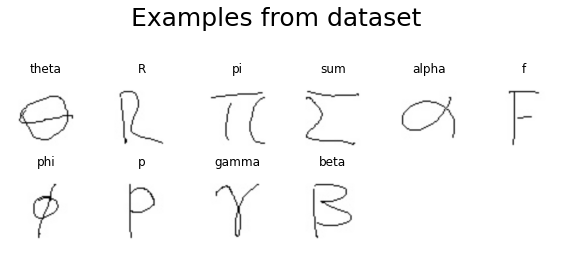

In [ ]:
figure = plt.figure(figsize=(10, 10))
figure.suptitle('Examples from dataset', size=25)
j = 1
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(6, 6, j if j<=36 else 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

In [ ]:
type(x)

list

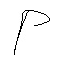

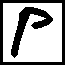

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


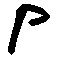

In [ ]:
from google.colab.patches import cv2_imshow
imm = x[14810]

gray = cv2.cvtColor(imm,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
 
contours1, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imm,contours1,-1,(0,0,0),3)
 
cv2_imshow(imm)

gray1 = cv2.cvtColor(imm,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray1, 120, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
(xx,yy,w,h) = cv2.boundingRect(cnt.astype(np.int))
crop = imm[yy:yy+h,xx:xx+w]

cv2_imshow(crop)

In [ ]:
X = []
type(x)
for i in range(len(x)):
    img = x[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #threshold_image = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
    #img_gray = ~img_gray
    #ret, binary = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
    contours1, hierarchy = cv2.findContours(img_gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img_gray, contours1, -1, (0,0,0), 3)
    #gray2 = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
    _,thresh = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    (xx,yy,w,h) = cv2.boundingRect(cnt.astype(np.int))
    crop = img_gray[yy:yy+h,xx:xx+w]

    img_gray = ~crop
    threshold_image = cv2.resize(img_gray, (28, 28))
    X.append(threshold_image)
print(len(X))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


22215


In [ ]:
X[0].shape

(28, 28)

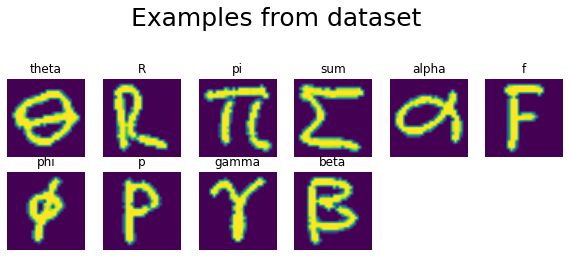

In [ ]:
figure = plt.figure(figsize=(10, 10))
figure.suptitle('Examples from dataset', size=25)
j = 1
for i in list(set(y)):
    idx = y.index(i)
    img = X[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(6, 6, j if j<=36 else 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

# Новый раздел

In [ ]:
# размер изображения
IMAGE_SZ = 28
# размер вектора шума 
LATENT_DIM = 100
# количество каналов, изображения чб
CHANNEL_SIZE = 1
IMAGE_SHAPE = (IMAGE_SZ, IMAGE_SZ, CHANNEL_SIZE)
# количество фильтров в сверточном слое 
NET_CAPACITY = 16
# размер пакета 
BATCH_SIZE_GAN = 32
# интервал для отображения сгенерированных изображений 
PROGRESS_INTERVAL = 500 
# оптимизатор
OPTIMIZER = Adam(0.0002, 0.5)

In [ ]:
 def build_generator():
      model = Sequential()

      model.add(Dense(256 * 7 * 7, use_bias=False, input_shape=(LATENT_DIM, )))
      model.add(BatchNormalization())
      model.add(LeakyReLU())
      model.add(Reshape((7, 7, 256)))
      '''
      model.add(Conv2DTranspose(filters=256, kernel_size=(5,5), padding='same', use_bias=False))
      model.add(BatchNormalization())
      model.add(LeakyReLU())
      '''
      model.add(Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same', use_bias=False))
      model.add(BatchNormalization())
      model.add(LeakyReLU())

      model.add(Conv2DTranspose(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', use_bias=False))
      model.add(BatchNormalization())
      model.add(LeakyReLU())
      '''
      model.add(Conv2DTranspose(filters=32, kernel_size=(5,5), padding='same', use_bias=False))
      model.add(BatchNormalization())
      model.add(LeakyReLU())
      '''
      model.add(Conv2DTranspose(filters=1, kernel_size=(3,3), padding='same', use_bias=False, activation='tanh'))

      #model.add(Dense(128 * 7 * 7, activation="relu", input_dim=LATENT_DIM))
      #model.add(Reshape((7, 7, 128)))
      #поменять
      #model.add(UpSampling2D())
      #model.add(Conv2D(128, kernel_size=3, padding="same"))
      #model.add(BatchNormalization(momentum=0.8))
      #model.add(Activation("relu"))
      #model.add(UpSampling2D())
      #model.add(Conv2D(64, kernel_size=3, padding="same"))
      #model.add(BatchNormalization(momentum=0.8))
      #model.add(Activation("relu"))
      #model.add(Conv2D(CHANNEL_SIZE, kernel_size=3, padding="same"))
      #model.add(Activation("tanh"))
      #model.add(Dense(1, activation='sigmoid'))


      model.summary()

      noise = Input(shape=(LATENT_DIM,))
      img = model(noise)

      return Model(noise, img)

In [ ]:
def build_discriminator():

      model = Sequential()

      '''
      model.add(Conv2D(32, kernel_size=3, strides=2, input_shape = IMAGE_SHAPE, padding="same"))
      model.add(LeakyReLU(alpha=0.2))
      model.add(Dropout(0.25))
      model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
      model.add(ZeroPadding2D(padding=((0,1),(0,1))))
      model.add(BatchNormalization(momentum=0.8))
      model.add(LeakyReLU(alpha=0.2))
      model.add(Dropout(0.25))
      model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
      model.add(BatchNormalization(momentum=0.8))
      model.add(LeakyReLU(alpha=0.2))
      model.add(Dropout(0.25))
      model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
      model.add(BatchNormalization(momentum=0.8))
      model.add(LeakyReLU(alpha=0.2))
      model.add(Dropout(0.25))
      model.add(Flatten())
      #добавить слой
      model.add(Dense(1, activation='sigmoid'))
      '''
      model.add(Conv2D(32, kernel_size=3, input_shape = IMAGE_SHAPE, padding="same"))
      model.add(LeakyReLU())
      model.add(Dropout(0.3))
      model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same'))
      model.add(ZeroPadding2D(padding=((0,1),(0,1))))
      model.add(LeakyReLU())
      model.add(Dropout(0.3))

      model.add(Conv2D(filters=128, kernel_size=(5, 5), strides=(2, 2), padding='same'))
      model.add(LeakyReLU())
      model.add(Dropout(0.3))

      model.add(Flatten())
      model.add(Dense(1, activation='sigmoid'))

      model.summary()

      img = Input(IMAGE_SHAPE)
      validity = model(img)

      return Model(img, validity)

In [ ]:
 def save_imgs(epoch, generator):
      r, c = 5, 5
      noise = np.random.normal(0, 1, (r * c, LATENT_DIM))
      gen_imgs = generator.predict(noise)

      # Rescale images 0 - 1
      gen_imgs = 0.5 * gen_imgs + 0.5

      fig, axs = plt.subplots(r, c)
      cnt = 0
      for i in range(r):
          for j in range(c):
              axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
              axs[i,j].axis('off')
              cnt += 1
      fig.savefig("/gdrive/MyDrive/DCGAN/test8/math_%d.png" % epoch)
      plt.close()

In [ ]:
def train(data, generator, discriminator, combined, epochs, batch_size=128, save_interval=50):
      
      # Rescale -1 to 1
      #X_train = (data.astype(np.float32) - 127.5) / 127.5
      X_train = (data / 127.5) - 1.
      X_train = np.expand_dims(X_train, axis=3)

      # Adversarial ground truths
      valid = np.ones((batch_size, 1))
      fake = np.zeros((batch_size, 1))

      for epoch in range(epochs):

          # ---------------------
          #  Train Discriminator
          # ---------------------

          # Select a random half of images
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]

          # Sample noise and generate a batch of new images
          noise = np.random.normal(0, 1, (batch_size, LATENT_DIM))
          gen_imgs = generator.predict(noise)

          # Train the discriminator (real classified as ones and generated as zeros)
          d_loss_real = discriminator.train_on_batch(imgs, valid)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

          # ---------------------
          #  Train Generator
          # ---------------------

          # Train the generator (wants discriminator to mistake images as real)
          g_loss = combined.train_on_batch(noise, valid)

          # Plot the progress
          if epoch % 100 == 0:
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

          # If at save interval => save generated image samples
          if epoch % save_interval == 0:
              save_imgs(epoch, generator)

In [ ]:
# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
      optimizer=OPTIMIZER,
      metrics=['accuracy'])

# Build the generator
generator = build_generator()

# The generator takes noise as input and generates imgs
z = Input(shape=(LATENT_DIM,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
valid = discriminator(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=OPTIMIZER)

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_148 (LeakyReLU)  (None, 28, 28, 32)       0         
                                                                 
 dropout_72 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_73 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 zero_padding2d (ZeroPadding  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 leaky_re_lu_149 (LeakyReLU)  (None, 15, 15, 64)       0         
                                                     

In [ ]:
X = np.array(X)
type(X)

numpy.ndarray

In [ ]:
train(X, generator, discriminator, combined, epochs=3001, batch_size=32, save_interval=100)

0 [D loss: 0.606321, acc.: 50.00%] [G loss: 1.615330]
100 [D loss: 0.001838, acc.: 100.00%] [G loss: 5.627347]
200 [D loss: 0.207372, acc.: 90.62%] [G loss: 0.195119]
300 [D loss: 0.565211, acc.: 75.00%] [G loss: 1.678133]
400 [D loss: 0.522887, acc.: 73.44%] [G loss: 1.571050]
500 [D loss: 0.688322, acc.: 68.75%] [G loss: 1.514315]
600 [D loss: 0.545221, acc.: 68.75%] [G loss: 1.737832]
700 [D loss: 0.496438, acc.: 76.56%] [G loss: 1.821376]
800 [D loss: 0.564749, acc.: 73.44%] [G loss: 1.655812]
900 [D loss: 0.584466, acc.: 64.06%] [G loss: 1.377676]
1000 [D loss: 0.581884, acc.: 65.62%] [G loss: 1.385479]
1100 [D loss: 0.645066, acc.: 70.31%] [G loss: 1.372555]
1200 [D loss: 0.631498, acc.: 60.94%] [G loss: 1.240878]
1300 [D loss: 0.646371, acc.: 62.50%] [G loss: 1.245958]
1400 [D loss: 0.573564, acc.: 73.44%] [G loss: 1.235794]
1500 [D loss: 0.709792, acc.: 50.00%] [G loss: 1.343396]
1600 [D loss: 0.560844, acc.: 73.44%] [G loss: 1.285819]
1700 [D loss: 0.514490, acc.: 73.44%] [G l

# Новый раздел

In [ ]:
from tensorflow.keras.optimizers import RMSprop

import keras.backend as K
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)
latent_dim = 100

# Following parameter and optimizer set as recommended in paper
n_critic = 5
clip_value = 0.01
optimizer = RMSprop(learning_rate=0.00005)

In [ ]:
def wasserstein_loss(y_true, y_pred):
    return -K.mean(y_true * y_pred)

def build_generator():

    model = Sequential()

    model.add(Dense(128 * 7 * 7, activation="relu", input_dim=latent_dim))
    model.add(Reshape((7, 7, 128)))
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    #model.add(Activation("relu"))
    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    #model.add(Activation("relu"))
    model.add(Conv2D(channels, kernel_size=4, padding="same"))
    model.add(Activation("tanh"))

    model.summary()

    noise = Input(shape=(latent_dim,))
    img = model(noise)

    return Model(noise, img)

In [ ]:
def build_critic():

    model = Sequential()

    model.add(Conv2D(16, kernel_size=3, strides=2, input_shape=img_shape, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1))

    model.summary()

    img = Input(shape=img_shape)
    validity = model(img)

    return Model(img, validity)

In [ ]:
def sample_images(epoch, generator):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("/gdrive/MyDrive/WGAN/Mathtest4/math_%d.png" % epoch)
    plt.close()

In [ ]:
def train(data, generator, critic, combined, epochs, batch_size=128, sample_interval=50):

    # Rescale -1 to 1
    #X_train = data / 127.5 - 1.
    X_train = (data.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)

    # Adversarial ground truths
    valid = np.ones((batch_size, 1))
    fake = -np.ones((batch_size, 1))

    for epoch in range(epochs):

        for _ in range(n_critic):

            # ---------------------
            #  Train Critic
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
                
            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, latent_dim))

            # Generate a batch of new images
            gen_imgs = generator.predict(noise)

            # Train the critic
            d_loss_real = critic.train_on_batch(imgs, valid)
            d_loss_fake = critic.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

            # Clip critic weights
            for l in critic.layers:
                weights = l.get_weights()
                weights = [np.clip(w, -clip_value, clip_value) for w in weights]
                l.set_weights(weights)


        # ---------------------
        #  Train Generator
        # ---------------------

        g_loss = combined.train_on_batch(noise, valid)

        # Plot the progress
        if epoch % 50 == 0:
          print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, 1 - d_loss[0], 100*d_loss[1], 1 - g_loss[0]))

        # If at save interval => save generated image samples
        if epoch % sample_interval == 0:
            sample_images(epoch, generator)

In [ ]:
 # Build and compile the critic
critic = build_critic()
critic.compile(loss=wasserstein_loss,
      optimizer=optimizer,
      metrics=['accuracy'])

# Build the generator
generator = build_generator()

# The generator takes noise as input and generated imgs
z = Input(shape=(latent_dim,))
img = generator(z)

# For the combined model we will only train the generator
critic.trainable = False

# The critic takes generated images as input and determines validity
valid = critic(img)
# The combined model  (stacked generator and critic)
combined = Model(z, valid)
combined.compile(loss=wasserstein_loss,
      optimizer=optimizer,
      metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 16)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 zero_padding2d (ZeroPadding  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 32)         128       
 ormalization)                                          

In [ ]:
X = np.array(X)
type(X)

numpy.ndarray

In [ ]:
train(X, generator, critic, combined, epochs=6000, batch_size=32, sample_interval=200)

0 [D loss: 0.999919, acc.: 0.00%] [G loss: 1.000350]
50 [D loss: 0.999969, acc.: 0.00%] [G loss: 1.000079]
100 [D loss: 0.999971, acc.: 0.00%] [G loss: 1.000078]
150 [D loss: 0.999973, acc.: 0.00%] [G loss: 1.000076]
200 [D loss: 0.999965, acc.: 0.00%] [G loss: 1.000081]
250 [D loss: 0.999975, acc.: 0.00%] [G loss: 1.000065]
300 [D loss: 0.999981, acc.: 0.00%] [G loss: 1.000058]
350 [D loss: 0.999969, acc.: 0.00%] [G loss: 1.000044]
400 [D loss: 0.999980, acc.: 0.00%] [G loss: 1.000062]
450 [D loss: 0.999972, acc.: 0.00%] [G loss: 1.000072]
500 [D loss: 0.999976, acc.: 0.00%] [G loss: 1.000065]
550 [D loss: 0.999972, acc.: 0.00%] [G loss: 1.000063]
600 [D loss: 0.999964, acc.: 0.00%] [G loss: 1.000055]
650 [D loss: 0.999976, acc.: 0.00%] [G loss: 1.000068]
700 [D loss: 0.999979, acc.: 0.00%] [G loss: 1.000042]
750 [D loss: 0.999977, acc.: 0.00%] [G loss: 1.000026]
800 [D loss: 0.999978, acc.: 0.00%] [G loss: 1.000015]
850 [D loss: 0.999980, acc.: 0.00%] [G loss: 1.000014]
900 [D loss: 